# Homework6
# Ying Cheng
# 6623516397

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/ breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Ma-lignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/irischeng/INF552/HOMEWORK/homework6/wdbc.csv', header = None)
# print(data)
data=pd.DataFrame(data[np.arange(1,32)])
# print(data)


data_M=data.loc[data[1]=='M']
# print(data_M)
data_B=data.loc[data[1]=='B']
# print(data_B)

test_set=data_M.iloc[:42,:].append(data_B.iloc[:71,:])
training_set=data_M.iloc[42:,:].append(data_B.iloc[71:,:])
# print(training_set)
# print(test_set)

In [2]:
training_set

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
47,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
53,M,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,...,20.600,24.13,135.10,1321.0,0.12800,0.22970,0.26230,0.13250,0.3021,0.07987
54,M,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,...,18.100,31.69,117.70,1030.0,0.13890,0.20570,0.27120,0.15300,0.2675,0.07873
56,M,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
57,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,...,17.870,30.70,115.70,985.5,0.13680,0.42900,0.35870,0.18340,0.3698,0.10940
62,M,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
64,M,12.680,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,...,17.090,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310
65,M,14.780,23.94,97.40,668.3,0.11720,0.14790,0.126700,0.090290,0.1953,...,17.310,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911
70,M,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,...,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
72,M,17.200,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390


In [3]:
test_set

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


## (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

## (b) i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [4]:
training_set_x=training_set[np.arange(2,32)]
# print(training_set_x)
training_set_y=training_set[1]
# print(training_set_y)

test_set_x=test_set[np.arange(2,32)]
test_set_y=test_set[1]

In [5]:
from sklearn import preprocessing

scaler_b11=preprocessing.MinMaxScaler()
scaler_b11.fit(training_set_x)
N_training_set_x = pd.DataFrame(scaler_b11.transform(training_set_x))
# print(N_training_set_x)

scaler_b12=preprocessing.MinMaxScaler()
scaler_b12.fit(test_set_x)
N_test_set_x = pd.DataFrame(scaler_b12.transform(test_set_x))
# print(N_test_set_x)

training_set_y.replace('M', 1, inplace=True)
training_set_y.replace('B', 0, inplace=True)
training_set_y=pd.DataFrame(training_set_y)

test_set_y.replace('M', 1, inplace=True)
test_set_y.replace('B', 0, inplace=True)
test_set_y=pd.DataFrame(test_set_y)

In [6]:
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

warnings.filterwarnings("ignore")

all_accuracy_training=[]
all_accuracy_test=[]
all_precision_training=[]
all_precision_test=[]
all_recall_training=[]
all_recall_test=[]
all_F_score_training=[]
all_F_score_test=[]
all_auc_training=[]
all_auc_test=[]
for i in np.arange(0,30,1):
    parameters_b1 = {'C':[0.0001, 0.01, 0.1, 1, 10, 10, 100,1000]}
    L1_penalty = LinearSVC(penalty='l1', dual=False, random_state=i)
    gridSearch=GridSearchCV(L1_penalty, parameters_b1, cv=5, n_jobs=-1)
    SVM_L1=gridSearch.fit(N_training_set_x, training_set_y)
#     print("the best parameters is:", SVM_L1.best_params_)
    predict_training=SVM_L1.predict(N_training_set_x)
    predict_test=SVM_L1.predict(N_test_set_x)

    accuracy_training=accuracy_score(training_set_y, predict_training)
    accuracy_test=accuracy_score(test_set_y, predict_test)
    all_accuracy_training.append(accuracy_training)
    all_accuracy_test.append(accuracy_test)
    # print(accuracy_training)
    # print(accuracy_test)
    precision_training=precision_score(training_set_y, predict_training, average=None)[0]
    precision_test=precision_score(test_set_y, predict_test, average=None)[0]
    all_precision_training.append(precision_training)
    all_precision_test.append(precision_test)
    # print(precision_training)
    # print(precision_test)
    recall_training=recall_score(training_set_y, predict_training, average=None)[0]
    recall_test=recall_score(test_set_y, predict_test, average=None)[0]
    all_recall_training.append(recall_training)
    all_recall_test.append(recall_test)
    # print(recall_training)
    # print(recall_test)
    F_score_training=f1_score(training_set_y, predict_training, average=None)[0]
    F_score_test=f1_score(test_set_y, predict_test, average=None)[0]
    all_F_score_training.append(F_score_training)
    all_F_score_test.append(F_score_test)
    # print(F_score_training)
    # print(F_score_test)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(training_set_y, predict_training)
    auc_training=metrics.auc(fpr1, tpr1)
    fpr2, tpr2, thresholds2 = metrics.roc_curve(test_set_y, predict_test)
    auc_test=metrics.auc(fpr2, tpr2)
    all_auc_training.append(auc_training)
    all_auc_test.append(auc_test)
    # print(auc_training)
    # print(auc_test)



In [7]:
mean_accuracy_training=np.mean(all_accuracy_training)
mean_accuracy_test=np.mean(all_accuracy_test)

mean_precision_training=np.mean(all_precision_training)
mean_precision_test=np.mean(all_precision_test)

mean_recall_training=np.mean(all_recall_training)
mean_recall_test=np.mean(all_recall_test)

mean_Fscore_training=np.mean(all_F_score_training)
mean_Fscore_test=np.mean(all_F_score_test)

mean_auc_training=np.mean(all_auc_training)
mean_auc_test=np.mean(all_auc_test)

print("the report of the training set:")
print("average accuracy:", mean_accuracy_training)
print("average precision:", mean_precision_training)
print("average recall:", mean_recall_training)
print("average Fscore:", mean_Fscore_training)
print("average auc", mean_auc_training)
print()
print("the report of the test set:")
print("average accuracy:", mean_accuracy_test)
print("average precision:", mean_precision_test)
print("average recall:", mean_recall_test)
print("average Fscore:", mean_Fscore_test)
print("average auc", mean_auc_test)

the report of the training set:
average accuracy: 0.9827485380116959
average precision: 0.978583902044092
average recall: 0.9942890442890443
average Fscore: 0.9863673927700786
average auc 0.9788111888111889

the report of the test set:
average accuracy: 0.8318584070796461
average precision: 1.0
average recall: 0.7323943661971831
average Fscore: 0.8453040113909889
average auc 0.8661971830985916


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix_training=confusion_matrix(training_set_y, predict_training)
print("the training confusion matrix of the last run is:")
print(confusion_matrix_training)

confusion_matrix_test=confusion_matrix(test_set_y, predict_test)
print("the test confusion matrix of the last run is:")
print(confusion_matrix_test)

the training confusion matrix of the last run is:
[[285   1]
 [  4 166]]
the test confusion matrix of the last run is:
[[52 19]
 [ 0 42]]


ROC of training


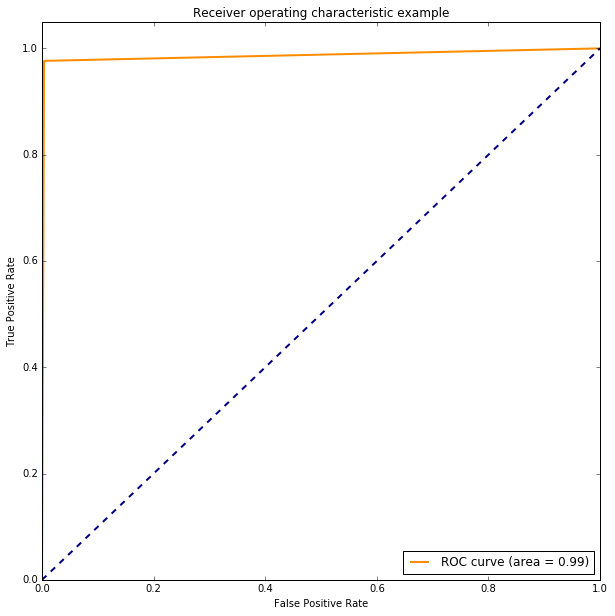

In [9]:
print("ROC of training")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_training) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC of training


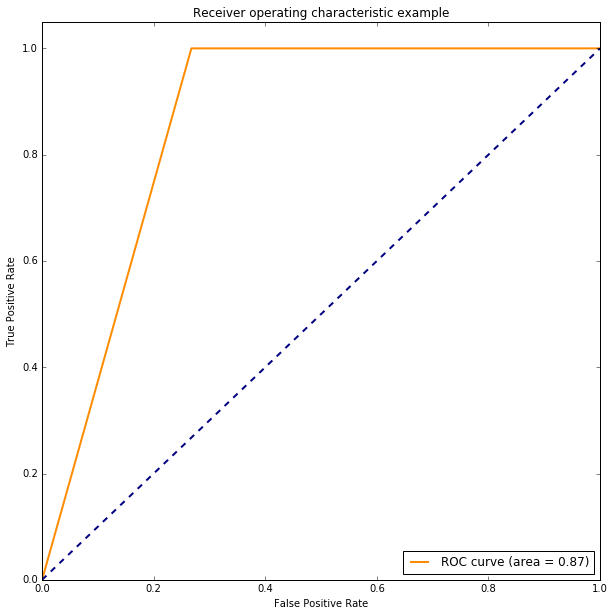

In [10]:
print("ROC of training")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_test) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## (b) ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [11]:
## b=0, m=1


# N_training_set_x 

# N_test_set_x 

# training_set_y

# test_set_y

training_set_M=training_set.loc[data[1]=='M']
training_set_B=training_set.loc[data[1]=='B']
labeled_data=training_set_M.iloc[:85,:].append(training_set_B.iloc[:143,:])
unlabeled_data=training_set_M.iloc[85:,:].append(training_set_B.iloc[143:,:])

In [12]:
labeled_data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
47,1,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790
53,1,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,...,20.600,24.13,135.10,1321.0,0.12800,0.22970,0.262300,0.13250,0.3021,0.07987
54,1,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,...,18.100,31.69,117.70,1030.0,0.13890,0.20570,0.271200,0.15300,0.2675,0.07873
56,1,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294
57,1,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,...,17.870,30.70,115.70,985.5,0.13680,0.42900,0.358700,0.18340,0.3698,0.10940
62,1,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.692200,0.17850,0.2844,0.11320
64,1,12.680,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,...,17.090,33.47,111.80,888.3,0.18510,0.40610,0.402400,0.17160,0.3383,0.10310
65,1,14.780,23.94,97.40,668.3,0.11720,0.14790,0.126700,0.090290,0.1953,...,17.310,33.39,114.60,925.1,0.16480,0.34160,0.302400,0.16140,0.3321,0.08911
70,1,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,...,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.268700,0.17890,0.2551,0.06589
72,1,17.200,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.656600,0.18990,0.3313,0.13390


In [13]:
unlabeled_data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
254,1,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.137900,0.085910,0.1776,...,25.700,24.57,163.10,1972.0,0.14970,0.31610,0.43170,0.19990,0.3379,0.08950
255,1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,...,16.390,22.07,108.10,826.0,0.15120,0.32620,0.32090,0.13740,0.3068,0.07957
256,1,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,...,25.050,36.27,178.60,1926.0,0.12810,0.53290,0.42510,0.19410,0.2818,0.10050
257,1,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.124200,0.2398,...,17.730,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
258,1,15.660,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,...,19.850,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
259,1,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,...,18.490,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040
260,1,20.310,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.093330,0.1814,...,24.330,39.16,162.30,1844.0,0.15220,0.29450,0.37880,0.16970,0.3151,0.07999
261,1,17.350,23.06,111.00,933.1,0.08662,0.06290,0.028910,0.028370,0.1564,...,19.850,31.47,128.20,1218.0,0.12400,0.14860,0.12110,0.08235,0.2452,0.06515
262,1,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,...,20.390,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484
263,1,15.610,19.38,100.00,758.6,0.07840,0.05616,0.042090,0.028470,0.1547,...,17.910,31.67,115.90,988.6,0.10840,0.18070,0.22600,0.08568,0.2683,0.06829


## (b) ii A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [14]:
labeled_data_x=labeled_data[np.arange(2,32)]
labeled_data_y=labeled_data[1]

In [15]:
scaler_b21=preprocessing.MinMaxScaler()
scaler_b21.fit(labeled_data_x)
N_labeled_data_x=pd.DataFrame(scaler_b21.transform(labeled_data_x))


In [16]:
parameters_b2a = {'C':[0.0001, 0.01, 0.1, 1, 10, 10, 100,1000]}
L1_penalty = LinearSVC(penalty='l1', dual=False, random_state=1)
gridSearch=GridSearchCV(L1_penalty, parameters_b2a, cv=5, n_jobs=-1)
SVM_L1=gridSearch.fit(N_labeled_data_x, labeled_data_y)
print("the best parameters is:", SVM_L1.best_params_)
# best_c_b2a=SVM_L1.best_params_
predict_training=SVM_L1.predict(N_labeled_data_x)


the best parameters is: {'C': 1}


## (b) ii B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [17]:
unlabeled_data_x=unlabeled_data[np.arange(2,32)]
unlabeled_data_y=unlabeled_data[1]

scaler_b22=preprocessing.MinMaxScaler()
scaler_b22.fit(unlabeled_data_x)
N_unlabeled_data_x=pd.DataFrame(scaler_b22.transform(unlabeled_data_x))

In [18]:
## label all the unlabeled data
for i in np.arange(0,228,1):
    SVM_b2b = LinearSVC(penalty='l1', dual=False, random_state=1, C=1)
    SVM_b2b.fit(N_labeled_data_x, labeled_data_y)
    # predict=SVM_b2b.predict(N_unlabeled_data_x)
    # print(predict)
    abs_distance=list(abs(SVM_b2b.decision_function(N_unlabeled_data_x)))
    # print(abs_distance)
    temp_max=max(abs_distance)
    temp_max_index=abs_distance.index(max(abs_distance))
#     print(temp_max_index)
    temp_x=N_unlabeled_data_x.iloc[temp_max_index,:]
#     print(temp_x)
    temp_max_label=pd.DataFrame(SVM_b2b.predict([temp_x]))
    # print(temp_max_label)
    N_labeled_data_x=N_labeled_data_x.append(temp_x)
    labeled_data_y=labeled_data_y.append(temp_max_label)
    N_unlabeled_data_x=N_unlabeled_data_x.drop([temp_max_index])
    N_unlabeled_data_x=N_unlabeled_data_x.reset_index(drop=True)
#     print(len(N_labeled_data_x))


In [19]:
N_labeled_data_x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.234357,0.302672,0.237259,0.137589,0.648376,0.318140,0.287254,0.364811,0.552616,0.471363,...,0.277971,0.477089,0.281145,0.174502,0.709437,0.429982,0.521024,0.717526,0.550707,0.701309
1,0.493158,0.304024,0.492597,0.356397,0.636209,0.396049,0.415183,0.526839,0.531915,0.345792,...,0.481960,0.362683,0.477917,0.363218,0.375289,0.223556,0.273002,0.455326,0.339966,0.275870
2,0.333265,0.416300,0.321181,0.215822,0.341282,0.157751,0.123079,0.165706,0.258194,0.177467,...,0.378517,0.589099,0.371916,0.265432,0.447269,0.197049,0.282265,0.525773,0.257013,0.263117
3,0.543894,0.299628,0.531285,0.408640,0.520623,0.329182,0.309981,0.447018,0.431282,0.251949,...,0.711188,0.482779,0.691136,0.640109,0.602457,0.357639,0.403726,0.718557,0.463678,0.310214
4,0.313278,0.401759,0.308459,0.191281,0.622825,0.359242,0.302952,0.403728,0.494537,0.466254,...,0.369000,0.559449,0.359732,0.250479,0.433402,0.443677,0.373335,0.630241,0.502278,0.606220
5,0.289704,0.420697,0.314932,0.186364,0.515756,0.556469,0.500234,0.430070,0.449684,0.609841,...,0.360725,0.523810,0.380445,0.241742,0.613023,0.659823,0.720441,0.613402,0.297531,0.648730
6,0.209245,0.477849,0.212782,0.121960,0.604575,0.327649,0.264292,0.341600,0.424382,0.421081,...,0.336726,0.642408,0.335973,0.217816,0.752361,0.418385,0.418818,0.589691,0.426756,0.535742
7,0.316866,0.481231,0.322223,0.196286,0.665409,0.394209,0.296860,0.448757,0.451984,0.438290,...,0.345829,0.640012,0.353031,0.230182,0.618305,0.347147,0.314738,0.554639,0.411892,0.379237
8,0.530057,0.392289,0.517149,0.398981,0.335564,0.256181,0.253046,0.395179,0.238643,0.117505,...,0.658226,0.436059,0.665550,0.546356,0.317837,0.227864,0.279663,0.614777,0.227284,0.119476
9,0.440886,0.500845,0.447214,0.310914,0.542523,0.501871,0.396439,0.394831,0.437033,0.393385,...,0.594505,0.652890,0.578434,0.484190,0.576702,0.786506,0.683389,0.652577,0.409974,0.880300


In [20]:
labeled_data_y

,0
47,1
53,1
54,1
56,1
57,1
62,1
64,1
65,1
70,1
72,1


In [21]:
N_test_set_x 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.776430,0.000000,0.845841,0.680286,0.662228,0.974415,0.730526,1.000000,0.642075,0.580609,...,0.821563,0.171692,0.975289,0.754712,0.604355,0.612180,0.568610,0.982599,0.598462,0.418864
1,0.958389,0.430653,0.953966,0.938120,0.190470,0.166423,0.211538,0.477022,0.292219,0.087103,...,0.803202,0.387371,0.787775,0.728784,0.285180,0.138771,0.192971,0.688634,0.233590,0.222878
2,0.896326,0.633450,0.922920,0.840539,0.538893,0.496426,0.480526,0.869477,0.440346,0.161442,...,0.736347,0.462575,0.741987,0.627130,0.456404,0.373894,0.359744,0.899667,0.403706,0.213433
3,0.313069,0.582751,0.361739,0.192463,1.000000,1.000000,0.587634,0.715160,0.744669,1.000000,...,0.328625,0.496985,0.352206,0.157420,1.000000,0.810538,0.548642,0.953351,1.000000,0.773711
4,0.938642,0.230769,0.977518,0.915113,0.408549,0.386371,0.481986,0.709041,0.290490,0.135468,...,0.687853,0.148280,0.739807,0.571981,0.398221,0.156956,0.319489,0.601629,0.157500,0.142595
5,0.385711,0.310023,0.415159,0.264657,0.793973,0.537443,0.384129,0.549898,0.450720,0.522839,...,0.354991,0.399432,0.385130,0.228990,0.744826,0.473122,0.427716,0.644576,0.477035,0.454939
6,0.794767,0.559441,0.811583,0.711226,0.329082,0.289717,0.274343,0.503059,0.281844,0.103896,...,0.703861,0.538134,0.747075,0.584739,0.454742,0.208942,0.302236,0.715291,0.295289,0.187853
7,0.474575,0.608974,0.496842,0.344625,0.669236,0.515107,0.227994,0.406866,0.513545,0.486565,...,0.429849,0.555161,0.437459,0.292946,0.630953,0.318251,0.213898,0.576083,0.321506,0.393939
8,0.424501,0.666667,0.467937,0.298532,0.786966,0.631660,0.452532,0.635826,0.602305,0.472682,...,0.355932,0.647038,0.405480,0.228043,0.671681,0.488145,0.430511,0.762680,0.554504,0.342123
9,0.386417,0.796037,0.430147,0.263705,0.665032,0.820094,0.553311,0.580761,0.417867,0.663905,...,0.337100,1.000000,0.343339,0.216561,0.796359,1.000000,0.882588,0.818215,0.552139,1.000000


In [22]:
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

warnings.filterwarnings("ignore")

all_accuracy_training=[]
all_accuracy_test=[]
all_precision_training=[]
all_precision_test=[]
all_recall_training=[]
all_recall_test=[]
all_F_score_training=[]
all_F_score_test=[]
all_auc_training=[]
all_auc_test=[]
for i in np.arange(0,30,1):
    
    SVM_b2b_M = LinearSVC(penalty='l1', dual=False, random_state=i, C=1)
    SVM_b2b_M.fit(N_labeled_data_x, labeled_data_y)
    predict_training=SVM_L1.predict(N_labeled_data_x)
    predict_test=SVM_L1.predict(N_test_set_x)
    
    accuracy_training=accuracy_score(labeled_data_y, predict_training)
    accuracy_test=accuracy_score(test_set_y, predict_test)
    all_accuracy_training.append(accuracy_training)
    all_accuracy_test.append(accuracy_test)
    # print(accuracy_training)
    # print(accuracy_test)
    precision_training=precision_score(labeled_data_y, predict_training, average=None)[0]
    precision_test=precision_score(test_set_y, predict_test, average=None)[0]
    all_precision_training.append(precision_training)
    all_precision_test.append(precision_test)
    # print(precision_training)
    # print(precision_test)
    recall_training=recall_score(labeled_data_y, predict_training, average=None)[0]
    recall_test=recall_score(test_set_y, predict_test, average=None)[0]
    all_recall_training.append(recall_training)
    all_recall_test.append(recall_test)
    # print(recall_training)
    # print(recall_test)
    F_score_training=f1_score(labeled_data_y, predict_training, average=None)[0]
    F_score_test=f1_score(test_set_y, predict_test, average=None)[0]
    all_F_score_training.append(F_score_training)
    all_F_score_test.append(F_score_test)
    # print(F_score_training)
    # print(F_score_test)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(labeled_data_y, predict_training)
    auc_training=metrics.auc(fpr1, tpr1)
    fpr2, tpr2, thresholds2 = metrics.roc_curve(test_set_y, predict_test)
    auc_test=metrics.auc(fpr2, tpr2)
    all_auc_training.append(auc_training)
    all_auc_test.append(auc_test)
    # print(auc_training)
    # print(auc_test)



In [23]:
mean_accuracy_training=np.mean(all_accuracy_training)
mean_accuracy_test=np.mean(all_accuracy_test)

mean_precision_training=np.mean(all_precision_training)
mean_precision_test=np.mean(all_precision_test)

mean_recall_training=np.mean(all_recall_training)
mean_recall_test=np.mean(all_recall_test)

mean_Fscore_training=np.mean(all_F_score_training)
mean_Fscore_test=np.mean(all_F_score_test)

mean_auc_training=np.mean(all_auc_training)
mean_auc_test=np.mean(all_auc_test)

print("the report of the training set:")
print("average accuracy:", mean_accuracy_training)
print("average precision:", mean_precision_training)
print("average recall:", mean_recall_training)
print("average Fscore:", mean_Fscore_training)
print("average auc", mean_auc_training)
print()
print("the report of the test set:")
print("average accuracy:", mean_accuracy_test)
print("average precision:", mean_precision_test)
print("average recall:", mean_recall_test)
print("average Fscore:", mean_Fscore_test)
print("average auc", mean_auc_test)

the report of the training set:
average accuracy: 0.9868421052631577
average precision: 0.9897959183673467
average recall: 0.9897959183673467
average Fscore: 0.9897959183673467
average auc 0.9856386999244144

the report of the test set:
average accuracy: 0.9026548672566369
average precision: 0.9838709677419356
average recall: 0.8591549295774645
average Fscore: 0.9172932330827065
average auc 0.9176727028839703


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix_training=confusion_matrix(labeled_data_y, predict_training)
print("the training confusion matrix of the last run is:")
print(confusion_matrix_training)

confusion_matrix_test=confusion_matrix(test_set_y, predict_test)
print("the test confusion matrix of the last run is:")
print(confusion_matrix_test)

the training confusion matrix of the last run is:
[[291   3]
 [  3 159]]
the test confusion matrix of the last run is:
[[61 10]
 [ 1 41]]


ROC of training


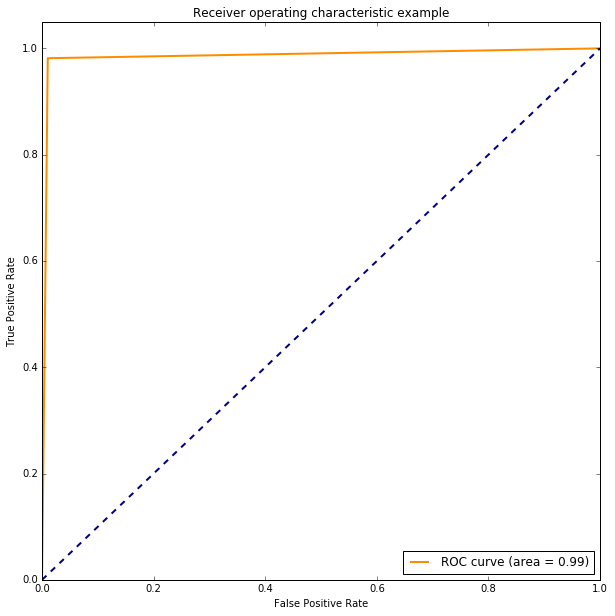

In [25]:
print("ROC of training")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_training) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC of training


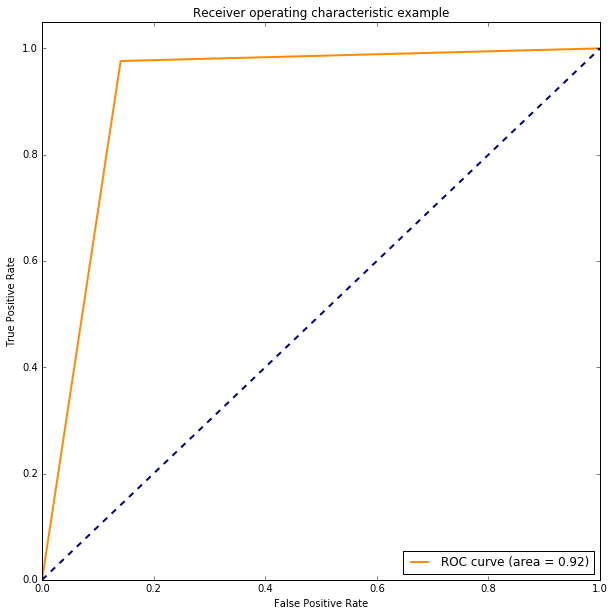

In [26]:
print("ROC of test")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_test) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## (b) iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

## (b) iii A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

## Answer: By setting random parameters and repeating multiple times, select different initial center points to avoid being trapped in a local minimum.

## (b) iii B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

## (b) iii C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [411]:
from sklearn.cluster import KMeans

# print(N_training_set_x)
# print(training_set_y)
# print(N_test_set_x)
# print(test_set_y.reset_index(drop=True))
# training_set_y=training_set_y.reset_index(drop=True)


all_accuracy_training=[]
all_accuracy_test=[]
all_precision_training=[]
all_precision_test=[]
all_recall_training=[]
all_recall_test=[]
all_F_score_training=[]
all_F_score_test=[]
all_auc_training=[]
all_auc_test=[]
for i in np.arange(0,30,1):
    kmeans = KMeans(n_clusters=2, random_state=i)
    kmeans.fit(training_set_x)

    predict_test=kmeans.predict(test_set_x)
    
    # print(len(kmeans.labels_))
    k_distance_0=[]   #all distance between all data to the cluster 0, 456
    k_distance_1=[]

    for i in np.arange(0,len(kmeans.labels_),1):
    #     print(kmeans.labels_[i])
    #     if kmeans.labels_[i]==0:
    #         print(training_set_x.iloc[i,:])
    #         k_distance=np.linalg.norm(kmeans.cluster_centers_[0] - training_set_x.iloc[i,:])
#         k_distance=np.sqrt(np.sum(np.square(kmeans.cluster_centers_[0] - training_set_x.iloc[i,:])))
        k_distance=np.sqrt(np.sum(np.square(training_set_x.iloc[i,:]-kmeans.cluster_centers_[0])))
        k_distance_0.append(k_distance)
    #     index_0.append(i)
    #         print(k_distance)
    #     elif kmeans.labels_[i]==1:
    #         k_distance=np.linalg.norm(kmeans.cluster_centers_[1] - training_set_x.iloc[i,:])
#         k_distance_=np.sqrt(np.sum(np.square(kmeans.cluster_centers_[1] - training_set_x.iloc[i,:])))
        k_distance_=np.sqrt(np.sum(np.square(training_set_x.iloc[i,:]-kmeans.cluster_centers_[1])))
        k_distance_1.append(k_distance_)
    #     index_1.append(i)
    #         print(k_distance)

    # print(pd.DataFrame(k_distance_0))
    # print(len(k_distance_1))
    # print(index_0)
    # print(index_1)
    # print(max(k_distance_0))
    min_index_0=[]
    for i in np.arange(0,30,1):
    #     print(i)

        temp_min=min(k_distance_0)
        temp_min_index=k_distance_0.index(min(k_distance_0))
        min_index_0.append(temp_min_index)
    #     print(temp_min_index)
        k_distance_0[temp_min_index]=max(k_distance_0)
    # print(min_index_0)

    min_index_1=[]
    for i in np.arange(0,30,1):
    #     print(i)

        temp_min=min(k_distance_1)
        temp_min_index=k_distance_1.index(min(k_distance_1))
        min_index_1.append(temp_min_index)
    #     print(temp_min_index)
        k_distance_1[temp_min_index]=max(k_distance_1)
    # print(min_index_1)

    cluster_0_true=training_set_y.iloc[min_index_0,:]
    cluster_1_true=training_set_y.iloc[min_index_1,:]
#     print(cluster_0_true)
#     print(cluster_1_true)

#     counts_0 = np.bincount(list(cluster_0_true))
#     pre_0=np.argmax(counts_0)
#     print("the prediction value of the first cluster is:", pre_0)
         # print(s)
#     if sum(list(cluster_0_true))<15:
#         pre_0=0
#     else:
#         pre_0=1
        
    s=cluster_0_true.sum().values[0]
    # print(s)
    if s<15:
        pre_0=0
    else:
        pre_0=1

    s=cluster_1_true.sum().values[0]
    # print(s)
    if s<15:
        pre_1=0
    else:
        pre_1=1
#     print("the prediction value of the second cluster is", pre_1)

    
        # print(kmeans.labels_)
    prediction_all=[]
    for i in np.arange(0,len(kmeans.labels_),1):
        if kmeans.labels_[i]==0:
            prediction_all.append(pre_0)
        elif kmeans.labels_[i]==1:
            prediction_all.append(pre_1)
    # print(prediction_all)
    
    prediction_test_all=[]
    for i in np.arange(0,len(predict_test),1):
        if predict_test[i]==0:
            prediction_test_all.append(pre_0)
        elif predict_test[i]==1:
            prediction_test_all.append(pre_1)
    # print(prediction_all)
    
    accuracy_training=accuracy_score(training_set_y, prediction_all)
    accuracy_test=accuracy_score(test_set_y, prediction_test_all)
    all_accuracy_training.append(accuracy_training)
    all_accuracy_test.append(accuracy_test)
    
#     print(accuracy_training)

    precision_training=precision_score(training_set_y, prediction_all, average=None)[0]
    precision_test=precision_score(test_set_y, prediction_test_all, average=None)[0]
    all_precision_training.append(precision_training)
    all_precision_test.append(precision_test)
#     print(precision_training)

    recall_training=recall_score(training_set_y, prediction_all, average=None)[0]
    recall_test=recall_score(test_set_y, prediction_test_all, average=None)[0]
    all_recall_training.append(recall_training)
    all_recall_test.append(recall_test)
#     print(recall_training)

    F_score_training=f1_score(training_set_y, prediction_all, average=None)[0]
    F_score_test=f1_score(test_set_y, prediction_test_all, average=None)[0]
    all_F_score_training.append(F_score_training)
    all_F_score_test.append(F_score_test)
#     print(F_score_training)

    fpr1, tpr1, thresholds1 = metrics.roc_curve(training_set_y, prediction_all)
    auc_training=metrics.auc(fpr1, tpr1)
    fpr2, tpr2, thresholds2 = metrics.roc_curve(test_set_y, prediction_test_all)
    auc_test=metrics.auc(fpr2, tpr2)
    all_auc_training.append(auc_training)
    all_auc_test.append(auc_test)
  

In [413]:
mean_accuracy_training=np.mean(all_accuracy_training)
mean_accuracy_test=np.mean(all_accuracy_test)

mean_precision_training=np.mean(all_precision_training)
mean_precision_test=np.mean(all_precision_test)

mean_recall_training=np.mean(all_recall_training)
mean_recall_test=np.mean(all_recall_test)

mean_Fscore_training=np.mean(all_F_score_training)
mean_Fscore_test=np.mean(all_F_score_test)

mean_auc_training=np.mean(all_auc_training)
mean_auc_test=np.mean(all_auc_test)

print("the report of the training set:")
print("average accuracy:", mean_accuracy_training)
print("average precision:", mean_precision_training)
print("average recall:", mean_recall_training)
print("average Fscore:", mean_Fscore_training)
print("average auc", mean_auc_training)
print()
print("the report of the test set:")
print("average accuracy:", mean_accuracy_test)
print("average precision:", mean_precision_test)
print("average recall:", mean_recall_test)
print("average Fscore:", mean_Fscore_test)
print("average auc", mean_auc_test)

the report of the training set:
average accuracy: 0.8486842105263156
average precision: 0.8073654390934843
average recall: 0.9965034965034965
average Fscore: 0.8920187793427233
average auc 0.798251748251748

the report of the test set:
average accuracy: 0.805309734513274
average precision: 0.7634408602150534
average recall: 1.0
average Fscore: 0.8658536585365856
average auc 0.7380952380952379


In [414]:
from sklearn.metrics import confusion_matrix

confusion_matrix_training=confusion_matrix(training_set_y, prediction_all)
print("the training confusion matrix of the last run is:")
print(confusion_matrix_training)

confusion_matrix_test=confusion_matrix(test_set_y, prediction_test_all)
print("the test confusion matrix of the last run is:")
print(confusion_matrix_test)

the training confusion matrix of the last run is:
[[285   1]
 [ 68 102]]
the test confusion matrix of the last run is:
[[71  0]
 [22 20]]


ROC of training


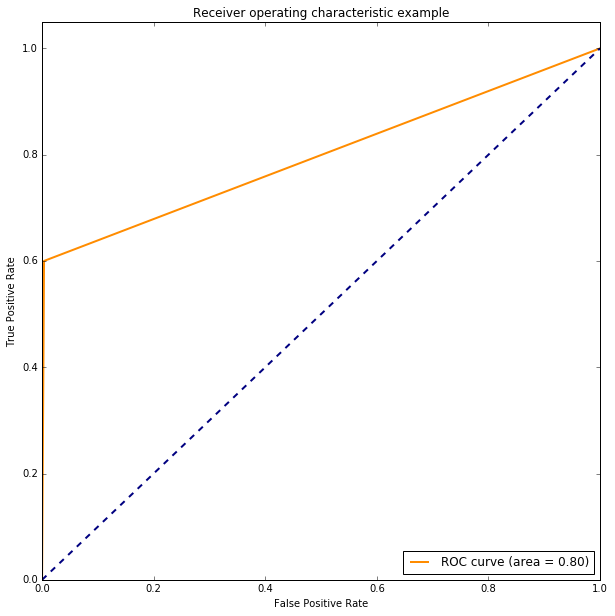

In [415]:
print("ROC of training")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_training) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC of test


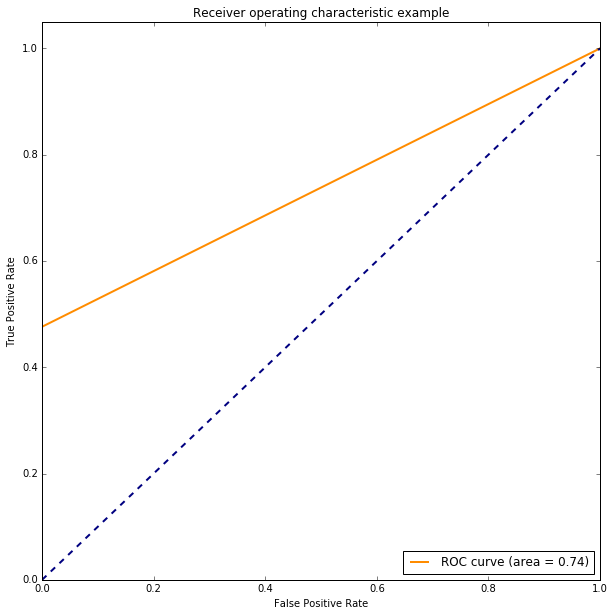

In [416]:
print("ROC of test")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_test) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## (b) iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel.

## spectral clustering: In multivariate statistics and the clustering of data, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In [488]:
from sklearn.cluster import SpectralClustering

# print(N_training_set_x)
# print(training_set_y)
# print(N_test_set_x)
# print(test_set_y.reset_index(drop=True))
# training_set_y=training_set_y.reset_index(drop=True)


all_accuracy_training=[]
all_accuracy_test=[]
all_precision_training=[]
all_precision_test=[]
all_recall_training=[]
all_recall_test=[]
all_F_score_training=[]
all_F_score_test=[]
all_auc_training=[]
all_auc_test=[]
gamma_range=np.arange(0,30,1)
# print(gamma_range)
for i in np.arange(0,1,1):
    rate_list=[]
    for gamma in gamma_range:
#         print("gamma is:",gamma)
        clustering = SpectralClustering(n_clusters=2, random_state=i, gamma=gamma, eigen_tol=1)
#     kmeans = KMeans(n_clusters=2, random_state=i)
        clustering.fit(training_set_x)
#         print(clustering.labels_)
        count_cluster_1=0
        for i in np.arange(0,len(clustering.labels_),1):
            if clustering.labels_[i]==1:
                count_cluster_1=count_cluster_1+1
        
#         print("cluster_1 的个数：", count_cluster_1)
#         print("cluster_0 的个数，", len(clustering.labels_)- count_cluster_1)
        
        if count_cluster_1>(len(clustering.labels_)- count_cluster_1):
            rate=count_cluster_1/len(clustering.labels_)- count_cluster_1
#             print("rate is:",rate)
            rate_list.append(abs(rate-1.681))
        else:
            rate=(len(clustering.labels_)- count_cluster_1)/count_cluster_1
#             print("rate is:",rate)
            rate_list.append(abs(rate-1.681))
            
            
#     print("rate list is:",rate_list)
#     print(rate_list.index(min(rate_list)))
    best_gamma=gamma_range[rate_list.index(min(rate_list))]
#     print (best_gamma)
    
    best_clustering = SpectralClustering(n_clusters=2, random_state=i, gamma=best_gamma, eigen_tol=1)
    best_clustering.fit(training_set_x)
#     print(best_clustering.labels_)  
    
    cluster0= pd.DataFrame()
    cluster1 = pd.DataFrame()
    for j in np.arange(0,len(best_clustering.labels_),1):
#         print(j)
        if best_clustering.labels_[j]==0:
            m=training_set_x.iloc[j,:]
#             cluster_1_true=training_set_y.iloc[min_index_1,:]
#             print(m)
            cluster0=cluster0.append(training_set_x.iloc[j,:])
        elif best_clustering.labels_[j]==1:
            cluster1=cluster1.append(training_set_x.iloc[j,:])
#     print(cluster0)
#     print(cluster1)
    center0=cluster0.mean().values.tolist()
    center1=cluster1.mean().values.tolist()
#     print(center0)
#     print(center1)

    
#     predict_test=best_clustering.fit_predict(test_set_x)
#     print("predict", predict_test)
    
# print(len(kmeans.labels_))
    k_distance_0=[]   #all distance between all data to the cluster 0, 456
    k_distance_1=[]

    for i in np.arange(0,len(best_clustering.labels_),1):
        k_distance=np.sqrt(np.sum(np.square(training_set_x.iloc[i,:]-center0)))
        k_distance_0.append(k_distance)
        k_distance_=np.sqrt(np.sum(np.square(training_set_x.iloc[i,:]-center1)))
        k_distance_1.append(k_distance_)
        
#     print(len(k_distance_0))
#     print(len(k_distance_1))

        
        
    min_index_0=[]
    for i in np.arange(0,30,1):
    #     print(i)

        temp_min=min(k_distance_0)
        temp_min_index=k_distance_0.index(min(k_distance_0))
        min_index_0.append(temp_min_index)
    #     print(temp_min_index)
        k_distance_0[temp_min_index]=max(k_distance_0)
#     print(min_index_0)

    min_index_1=[]
    for i in np.arange(0,30,1):
    #     print(i)

        temp_min=min(k_distance_1)
        temp_min_index=k_distance_1.index(min(k_distance_1))
        min_index_1.append(temp_min_index)
    #     print(temp_min_index)
        k_distance_1[temp_min_index]=max(k_distance_1)
#     print(min_index_1)

    cluster_0_true=training_set_y.iloc[min_index_0,:]
    cluster_1_true=training_set_y.iloc[min_index_1,:]


    s=cluster_0_true.sum().values[0]
    # print(s)
    if s<15:
        pre_0=0
    else:
        pre_0=1

    s=cluster_1_true.sum().values[0]
    # print(s)
    if s<15:
        pre_1=0
    else:
        pre_1=1
        
#     print(pre_1)
#     print(pre_0)
    
    prediction_all=[]
#     print(best_clustering.labels_)
    for i in np.arange(0,len(best_clustering.labels_),1):
#         print(best_clustering.labels_[i])
        if best_clustering.labels_[i]==0:
            prediction_all.append(pre_0)
        elif best_clustering.labels_[i]==1:
#             print(best_clustering.labels_[i])
            prediction_all.append(pre_1)
#     print(prediction_all)
#     print(best_clustering.labels_)

   
    
    accuracy_training=accuracy_score(training_set_y, prediction_all)
    accuracy_test=accuracy_score(test_set_y, prediction_test_all)
    all_accuracy_training.append(accuracy_training)
    all_accuracy_test.append(accuracy_test)
    
#     print(accuracy_training)

    precision_training=precision_score(training_set_y, pd.DataFrame(prediction_all), average=None)[0]
    precision_test=precision_score(test_set_y, prediction_test_all, average=None)[0]
    all_precision_training.append(precision_training)
    all_precision_test.append(precision_test)
#     print(precision_training)

    recall_training=recall_score(training_set_y, prediction_all, average=None)[0]
    recall_test=recall_score(test_set_y, prediction_test_all, average=None)[0]
    all_recall_training.append(recall_training)
    all_recall_test.append(recall_test)
#     print(recall_training)

    F_score_training=f1_score(training_set_y, prediction_all, average=None)[0]
    F_score_test=f1_score(test_set_y, prediction_test_all, average=None)[0]
    all_F_score_training.append(F_score_training)
    all_F_score_test.append(F_score_test)
#     print(F_score_training)

    fpr1, tpr1, thresholds1 = metrics.roc_curve(training_set_y, prediction_all)
    auc_training=metrics.auc(fpr1, tpr1)
    fpr2, tpr2, thresholds2 = metrics.roc_curve(test_set_y, prediction_test_all)
    auc_test=metrics.auc(fpr2, tpr2)
    all_auc_training.append(auc_training)
    all_auc_test.append(auc_test)
  

In [489]:
mean_accuracy_training=np.mean(all_accuracy_training)
mean_accuracy_test=np.mean(all_accuracy_test)

mean_precision_training=np.mean(all_precision_training)
mean_precision_test=np.mean(all_precision_test)

mean_recall_training=np.mean(all_recall_training)
mean_recall_test=np.mean(all_recall_test)

mean_Fscore_training=np.mean(all_F_score_training)
mean_Fscore_test=np.mean(all_F_score_test)

mean_auc_training=np.mean(all_auc_training)
mean_auc_test=np.mean(all_auc_test)

print("the report of the training set:")
print("average accuracy:", mean_accuracy_training)
print("average precision:", mean_precision_training)
print("average recall:", mean_recall_training)
print("average Fscore:", mean_Fscore_training)
print("average auc", mean_auc_training)
print()
print("the report of the test set:")
print("average accuracy:", mean_accuracy_test)
print("average precision:", mean_precision_test)
print("average recall:", mean_recall_test)
print("average Fscore:", mean_Fscore_test)
print("average auc", mean_auc_test)

the report of the training set:
average accuracy: 0.6162280701754386
average precision: 0.6868686868686869
average recall: 0.7132867132867133
average Fscore: 0.6998284734133791
average auc 0.5831139448786508

the report of the test set:
average accuracy: 0.6106194690265486
average precision: 0.6336633663366337
average recall: 0.9014084507042254
average Fscore: 0.744186046511628
average auc 0.5102280348759223


In [490]:
from sklearn.metrics import confusion_matrix

confusion_matrix_training=confusion_matrix(training_set_y, prediction_all)
print("the training confusion matrix of the last run is:")
print(confusion_matrix_training)

confusion_matrix_test=confusion_matrix(test_set_y, prediction_test_all)
print("the test confusion matrix of the last run is:")
print(confusion_matrix_test)

the training confusion matrix of the last run is:
[[204  82]
 [ 93  77]]
the test confusion matrix of the last run is:
[[64  7]
 [37  5]]


ROC of training


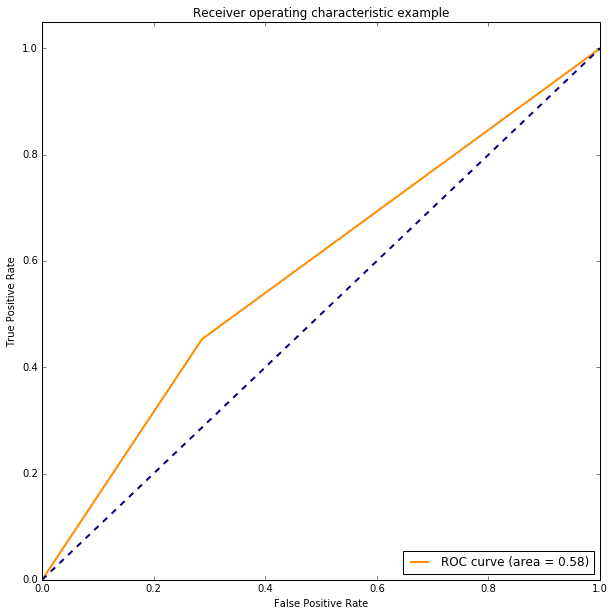

In [491]:
print("ROC of training")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_training) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC of test


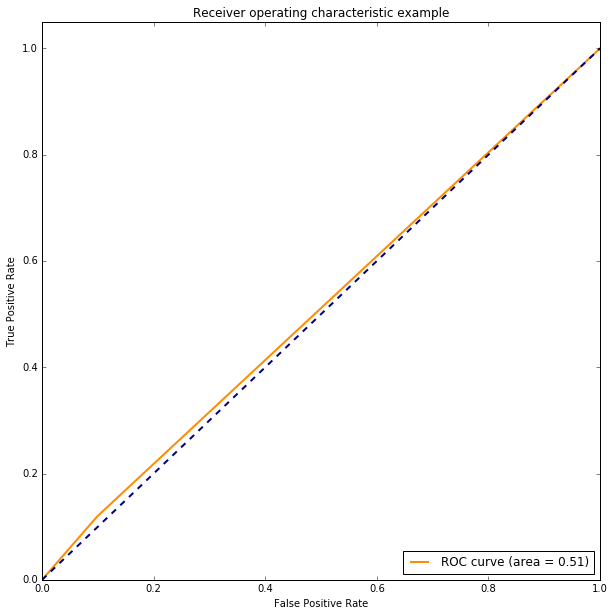

In [492]:
print("ROC of test")
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_test) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## (b) v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

####supervised learning:

the report of the training set:
average accuracy: 0.9827485380116959
average precision: 0.978583902044092
average recall: 0.9942890442890443
average Fscore: 0.9863673927700786
average auc 0.9788111888111889

the report of the test set:
average accuracy: 0.8318584070796461
average precision: 1.0
average recall: 0.7323943661971831
average Fscore: 0.8453040113909889
average auc 0.8661971830985916


####semi-supervised learning:

the report of the training set:
average accuracy: 0.9868421052631577
average precision: 0.9897959183673467
average recall: 0.9897959183673467
average Fscore: 0.9897959183673467
average auc 0.9856386999244144

the report of the test set:
average accuracy: 0.9026548672566369
average precision: 0.9838709677419356
average recall: 0.8591549295774645
average Fscore: 0.9172932330827065
average auc 0.9176727028839703


####unsupervised learning:

the report of the training set:
average accuracy: 0.8486842105263156
average precision: 0.8073654390934843
average recall: 0.9965034965034965
average Fscore: 0.8920187793427233
average auc 0.798251748251748

the report of the test set:
average accuracy: 0.805309734513274
average precision: 0.7634408602150534
average recall: 1.0
average Fscore: 0.8658536585365856
average auc 0.7380952380952379


####spectral-clustering:

the report of the training set:
average accuracy: 0.6162280701754386
average precision: 0.6868686868686869
average recall: 0.7132867132867133
average Fscore: 0.6998284734133791
average auc 0.5831139448786508

the report of the test set:
average accuracy: 0.6106194690265486
average precision: 0.6336633663366337
average recall: 0.9014084507042254
average Fscore: 0.744186046511628
average auc 0.5102280348759223

## In this question, the results from the supervised learning and semi-supervised learning are similiar. The performance of the unsupervised learning is worse than the supervised one and semi-supervised one. As for spectral-clustering, it perform the worst in this question. 

## 2. Active Learning Using Support Vector Machines

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [239]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/irischeng/INF552/HOMEWORK/homework6/data_banknote_authentication.csv', skiprows=9, names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

x_train, x_test, y_train, y_test = train_test_split(data[['variance', 'skewness', 'curtosis', 'entropy']], data['class'], test_size=0.3435, random_state=42)


In [402]:
x_train

,variance,skewness,curtosis,entropy
0,-1.878200,-6.58650,4.848600,-0.021566
1,5.042900,-0.52974,0.504390,1.106000
2,-2.178600,-6.44790,6.034400,-0.207770
3,-1.682000,-6.81210,7.139800,1.332300
4,-2.913800,-9.47110,9.766800,-0.602160
5,4.985200,8.35160,-2.542500,-1.282300
6,-2.445800,1.62850,-0.885410,-1.480200
7,4.929400,0.27727,0.207920,0.336620
8,3.757000,-5.42360,3.825500,-1.252600
9,-3.127300,-7.11210,11.389700,-0.083634


In [403]:
y_train

0      1
1      0
2      1
3      1
4      1
5      0
6      1
7      0
8      0
9      1
10     0
11     0
12     0
13     1
14     0
15     1
16     0
17     0
18     0
19     0
20     1
21     1
22     0
23     0
24     1
25     0
26     0
27     1
28     1
29     1
      ..
870    0
871    1
872    0
873    0
874    0
875    1
876    0
877    1
878    0
879    1
880    1
881    0
882    1
883    0
884    1
885    1
886    0
887    1
888    1
889    0
890    0
891    1
892    0
893    0
894    1
895    1
896    1
897    1
898    1
899    1
Name: class, dtype: int64

In [404]:
x_test

,variance,skewness,curtosis,entropy
430,1.569100,6.346500,-0.18280,-2.409900
588,-0.278020,8.188100,-3.13380,-2.527600
296,0.051979,7.052100,-2.05410,-3.150800
184,-1.755900,11.945900,3.09460,-4.897800
244,2.428700,9.382100,-3.24770,-1.454300
590,4.635200,-3.008700,2.67730,1.212000
78,0.248350,7.643900,0.98850,-0.873710
708,5.173100,3.960600,-1.98300,0.407740
411,4.004700,0.459370,1.36210,1.618100
43,0.964410,5.839500,2.32350,0.066365


In [405]:
y_test

430     0
588     0
296     0
184     0
244     0
590     0
78      0
708     0
411     0
43      0
1033    1
1176    1
233     0
893     1
322     0
796     1
839     1
1090    1
887     1
936     1
67      0
331     0
1083    1
551     0
990     1
700     0
289     0
771     1
597     0
432     0
       ..
355     0
138     0
381     0
292     0
1116    1
937     1
141     0
705     0
654     0
572     0
139     0
1201    1
1094    1
224     0
939     1
274     0
323     0
1098    1
409     0
325     0
847     1
299     0
739     0
534     0
949     1
1272    1
865     1
478     0
793     1
1193    1
Name: class, dtype: int64

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

## (b) i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [501]:
# x_train
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

temp_train_x = pd.DataFrame()
temp_train_y = pd.DataFrame()
temp_train_x = x_train.sample(n=10, replace=False, random_state=1)
temp_train_y = y_train.sample(n=10, replace=False, random_state=1)
# print(temp_train_x)
# print(temp_train_x.index)

temp_after_drop_x=x_train.drop(temp_train_x.index)
temp_after_drop_y=y_train.drop(temp_train_y.index)
# print(temp_after_drop_x)

all_90_test_error_1=[]
for i in np.arange(0,90,1):
#     print(temp_train_x.shape)
    all_50_test_error=[]
    for j in np.arange(0,50,1):
    
        all_c_score=[]
        C=[0.001, 0.01, 0.1, 1, 10, 10, 100, 1000]
        for c in C:
    #         print(c)
            L1_penalty = LinearSVC(penalty='l1', dual=False, C=c, random_state=j)

            kf=KFold(n_splits=10)

            c_score=[]
            for train_index, test_index in kf.split(temp_train_x, temp_train_y):
            #         print("TRAIN:", train_index, "TEST:", test_index)
                temp_x_train_set = temp_train_x.iloc[train_index]
                temp_y_train_set = temp_train_y.iloc[train_index]
                temp_x_test_set = temp_train_x.iloc[test_index]
                temp_y_test_set = temp_train_y.iloc[test_index]   
            #         print(temp_train_x)
                L1_penalty.fit(temp_x_train_set,temp_y_train_set)
                temp_score=L1_penalty.score(temp_x_test_set,temp_y_test_set)
                c_score.append(temp_score)
            #     print(c_score)
            #     print(np.mean(c_score))
            #     print()
            all_c_score.append(np.mean(c_score))
#             print(all_c_score)
            # print()

        temp_best_c=C[all_c_score.index(max(all_c_score))]
#         print(temp_best_c)


        temp_L1_penalty = LinearSVC(penalty='l1', dual=False, C=temp_best_c, random_state=j)
        temp_L1_penalty.fit(temp_train_x, temp_train_y)
    #     print(temp_train_x.shape)
        temp_test_error=1-temp_L1_penalty.score(x_test, y_test)
        all_50_test_error.append(temp_test_error)
#     print(all_50_test_error)
    print(np.mean(all_50_test_error))
    
    ##
#     print(temp_after_drop_x)
    if i !=89:
        x=temp_after_drop_x.sample(n=10, random_state=1)
        y=temp_after_drop_y.sample(n=10, random_state=1)
        temp_train_x=temp_train_x.append(x)
        temp_train_y=temp_train_y.append(y)

    #     print(temp_train_x.shape)
    #     print(temp_train_x)
    #     print(x.index)
        temp_after_drop_x=temp_after_drop_x.drop(x.index)
        temp_after_drop_y=temp_after_drop_y.drop(y.index)
    #     print(temp_after_drop_x.shape)
    
    
    all_90_test_error_1.append(np.mean(all_50_test_error))
print(all_90_test_error_1)
        




0.1644915254237288
0.17372881355932202
0.038135593220339
0.039872881355932206
0.03182203389830511
0.033898305084745776
0.012711864406779627
0.014830508474576232
0.014830508474576232
0.014830508474576232
0.012711864406779627
0.014830508474576232
0.014830508474576232
0.014830508474576232
0.01906779661016944
0.01906779661016944
0.01906779661016944
0.01906779661016944
0.01906779661016944
0.012711864406779627
0.012711864406779627
0.012711864406779627
0.012711864406779627
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.01

## (b) ii. Train a SVM with a pool of 10 randomly selected data points from the training set3 using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM4 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [522]:
# x_train
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

temp_train_x = pd.DataFrame()
temp_train_y = pd.DataFrame()
temp_train_x = x_train.sample(n=10, replace=False, random_state=1)
temp_train_y = y_train.sample(n=10, replace=False, random_state=1)
# print(temp_train_x)
# print(temp_train_x.index)

temp_after_drop_x=x_train.drop(temp_train_x.index)
temp_after_drop_y=y_train.drop(temp_train_y.index)
# print(temp_after_drop_x)

all_90_test_error_2=[]
for i in np.arange(0,90,1):
#     print(temp_train_x.shape)
    all_50_test_error=[]
    for j in np.arange(0,50,1):
    
        all_c_score=[]
        C=[0.001, 0.01, 0.1, 1, 10, 10, 100, 1000]
        for c in C:
    #         print(c)
            L1_penalty = LinearSVC(penalty='l1', dual=False, C=c, random_state=j)

            kf=KFold(n_splits=10)

            c_score=[]
            for train_index, test_index in kf.split(temp_train_x, temp_train_y):
            #         print("TRAIN:", train_index, "TEST:", test_index)
                temp_x_train_set = temp_train_x.iloc[train_index]
                temp_y_train_set = temp_train_y.iloc[train_index]
                temp_x_test_set = temp_train_x.iloc[test_index]
                temp_y_test_set = temp_train_y.iloc[test_index]   
            #         print(temp_train_x)
                L1_penalty.fit(temp_x_train_set,temp_y_train_set)
                temp_score=L1_penalty.score(temp_x_test_set,temp_y_test_set)
                c_score.append(temp_score)
            #     print(c_score)
            #     print(np.mean(c_score))
            #     print()
            all_c_score.append(np.mean(c_score))
#             print(all_c_score)
            # print()

        temp_best_c=C[all_c_score.index(max(all_c_score))]
#         print(temp_best_c)


        temp_L1_penalty = LinearSVC(penalty='l1', dual=False, C=temp_best_c, random_state=j)
        temp_L1_penalty.fit(temp_train_x, temp_train_y)
    #     print(temp_train_x.shape)
        temp_test_error=1-temp_L1_penalty.score(x_test, y_test)
        all_50_test_error.append(temp_test_error)
#     print(all_50_test_error)
    print(np.mean(all_50_test_error))
    
    ##
#     print(temp_after_drop_x)
    if i !=89:
        distance=list(abs(temp_L1_penalty.decision_function(temp_after_drop_x)))
#         print(len(distance))
        
        temp_10_min_index=[]
        for k in np.arange(0,10,1):
            temp_min=min(distance)
#             print(temp_min)
            temp_min_index=distance.index(min(distance))
#             print(temp_min_index)
            temp_10_min_index.append(temp_min_index)
            distance[temp_min_index]=max(distance)
        
#         print(temp_10_min_index)
        
        temp_after_drop_x=temp_after_drop_x.reset_index(drop=True)
        temp_after_drop_y=temp_after_drop_y.reset_index(drop=True)
        
        x=temp_after_drop_x.iloc[temp_10_min_index,:]
#         print(x.index)
        y=temp_after_drop_y.iloc[temp_10_min_index]
#         print(y)

        temp_train_x=temp_train_x.append(x)
        temp_train_y=temp_train_y.append(y)

        temp_after_drop_x=temp_after_drop_x.drop(x.index)
        temp_after_drop_y=temp_after_drop_y.drop(y.index)
    #     print(temp_after_drop_x.shape)
    
    
    all_90_test_error_2.append(np.mean(all_50_test_error))
print(all_90_test_error_2)
        




0.1644915254237288
0.03601694915254239
0.04872881355932201
0.02347457627118649
0.020847457627118638
0.012711864406779627
0.012711864406779627
0.012669491525423696
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.010593220338983023
0.0105932203389830

## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

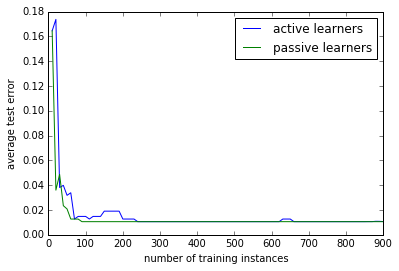

In [524]:
plt.plot(np.arange(10,901,10), np.array(all_90_test_error_1), label='active learners')
plt.plot(np.arange(10,901,10), np.array(all_90_test_error_2), label='passive learners')
# plt.gca().invert_xaxis()
plt.legend(loc='upper right')
plt.xlabel('number of training instances')
plt.ylabel('average test error')

## conclusion: At first, active learners' performance is not as good as passive learners, but as the amount of data increases, active learners' performance becomes better. When the amount of data is large enough, active learners and passive learners are almost the same